In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Qwind

This notebook shows a quick example on how to get Qwind up and running.

First, we load the core code module.

In [17]:
from qwind import wind
from qwind import constants

Next we initialise the black hole system, the parameters we can specifiy are:

For now we just initialise it with the default values,

In [8]:
example = wind.Qwind(lines_r_min = 60, lines_r_max=200, f_x=0.1, rho_shielding=1e10, nr=50, T=25e3)

We can now initialise a streamline at a certain radius with some initial density and velocity by doing

In [9]:
line = example.line(r_0 = 150, rho_0 = 1e10, v_z_0 = 1e7, max_iter=1000)

And iterate its equation of motion

In [10]:
line.iterate()

 💥 

As we have been indicated, the line has fallen back to the disc. We can now plot different properties of the stramline.

In [11]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'z [Rg]')

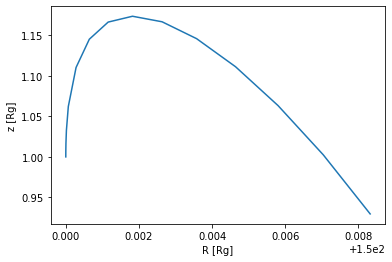

In [12]:
plt.plot(line.r_hist, line.z_hist)
plt.xlabel("R [Rg]")
plt.ylabel("z [Rg]")

The ammount of debugging information available for a streamline is:

In [13]:
for key in line.__dict__.keys():
    if 'hist' in key:
        print(key)

fg_hist
fr_hist
d_hist
t_hist
r_hist
phi_hist
z_hist
v_r_hist
v_phi_hist
v_z_hist
v_T_hist
v_th_hist
rho_hist
tau_dr_hist
dv_dr_hist
tau_uv_hist
tau_x_hist
tau_eff_hist
fm_hist
xi_hist
T_hist
a_hist
a_T_hist


We can also lunch several lines at once.

In [14]:
example.start_lines(v_z_0=1e7, rho_0=1e10)

 💥  💨  💨  💨  💨  💨  💨  💨  💨  💨  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥  💥 

You might have noticed some question marks for some lines, these means that they have been terminated because they were stalling. This is common in the boundary area where tau_x ~ 1 or tau_uv ~ 1

(0.0, 500.0)

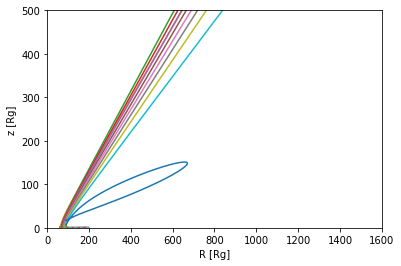

In [15]:
for line in example.lines:
    plt.plot(line.r_hist, line.z_hist)
plt.xlabel("R [Rg]")
plt.ylabel("z [Rg]")
plt.xlim(0,1600)
plt.ylim(0,500)

In [11]:
example.mdot_w # units of g/s

9.218237657197967e+23

In [19]:
example.mdot_w / (example.eddington_luminosity / (example.eta * constants.C**2)) # units of MdotEdd

0.00354877493195825